In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper8.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper1.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock4.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors3.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock2.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper3.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper7.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors5.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors7.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock9.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors8.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/valid

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
TRAINING_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                        target_size=(150,150),
                                                        class_mode='categorical',
                                                        batch_size=126)

VALIDATION_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(150,150),
                                                              class_mode='categorical',
                                                              batch_size=126)
TEST_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                 target_size=(150,150),
                                                 class_mode="categorical",
                                                 batch_size=126)


Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 372 images belonging to 3 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
cnn= Sequential()
cnn.add(Conv2D(filters=64,activation="relu",kernel_size=3,input_shape=(150,150,3)))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=64, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=128, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=128, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(units=512, activation="relu"))
cnn.add(Dense(units=3,activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])
callback=EarlyStopping(monitor="val_loss", patience=2)
history=cnn.fit(train_generator,validation_data= test_generator,epochs=10,
        steps_per_epoch=20,validation_steps=3,callbacks=[callback])

Epoch 1/10
20/20 [==============================] - 107s 5s/step - loss: 1.1780 - accuracy: 0.3630 - val_loss: 1.0584 - val_accuracy: 0.3978
Epoch 2/10
20/20 [==============================] - 100s 5s/step - loss: 1.0707 - accuracy: 0.4336 - val_loss: 0.8764 - val_accuracy: 0.6210
Epoch 3/10
20/20 [==============================] - 100s 5s/step - loss: 0.8952 - accuracy: 0.5776 - val_loss: 0.4027 - val_accuracy: 0.8172
Epoch 4/10
20/20 [==============================] - 99s 5s/step - loss: 0.7544 - accuracy: 0.6983 - val_loss: 0.5227 - val_accuracy: 0.9731
Epoch 5/10
20/20 [==============================] - 100s 5s/step - loss: 0.6411 - accuracy: 0.7145 - val_loss: 0.3017 - val_accuracy: 0.8817
Epoch 6/10
20/20 [==============================] - 99s 5s/step - loss: 0.4707 - accuracy: 0.8041 - val_loss: 0.2000 - val_accuracy: 0.9651
Epoch 7/10
20/20 [==============================] - 99s 5s/step - loss: 0.4257 - accuracy: 0.8371 - val_loss: 0.1373 - val_accuracy: 0.9651
Epoch 8/10
20/20

In [6]:
pd.DataFrame(cnn.history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.122506,0.378175,1.058446,0.397849
1,1.049401,0.458333,0.876400,0.620968
2,0.846904,0.607540,0.402685,0.817204
3,0.779369,0.671429,0.522710,0.973118
4,0.598448,0.746825,0.301750,0.881720
5,0.439561,0.823016,0.199999,0.965054
6,0.390660,0.855159,0.137259,0.965054
7,0.291112,0.891270,0.107184,0.967742
8,0.211268,0.924603,0.109339,0.973118
9,0.194554,0.938889,0.058619,0.978495


<AxesSubplot:>

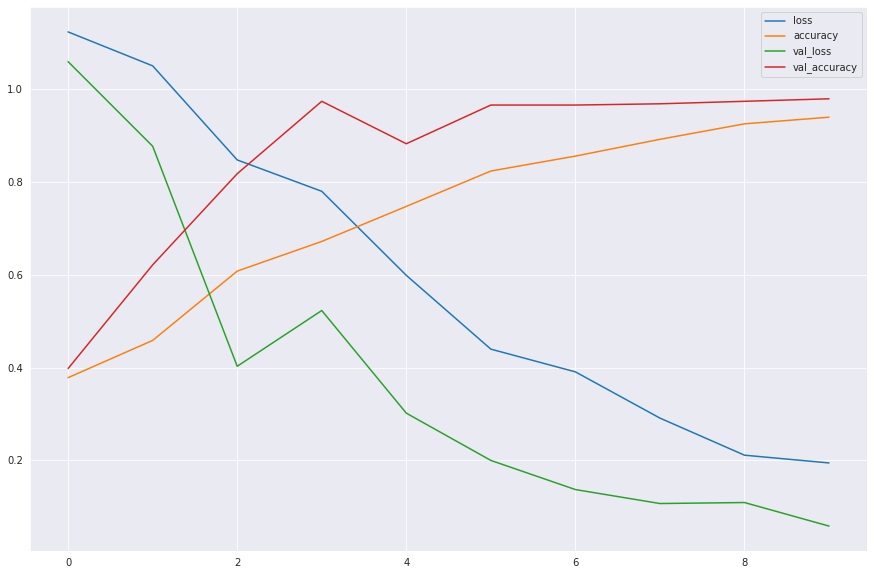

In [7]:
sns.set_style("darkgrid")
pd.DataFrame(cnn.history.history).plot(figsize=(15,10))

In [8]:
from tensorflow.keras.preprocessing import image
def predictor(location):
    test_image=image.load_img(location,target_size=(150,150))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    training_set.class_indices
    
    print(result[0][0])
    return prediction

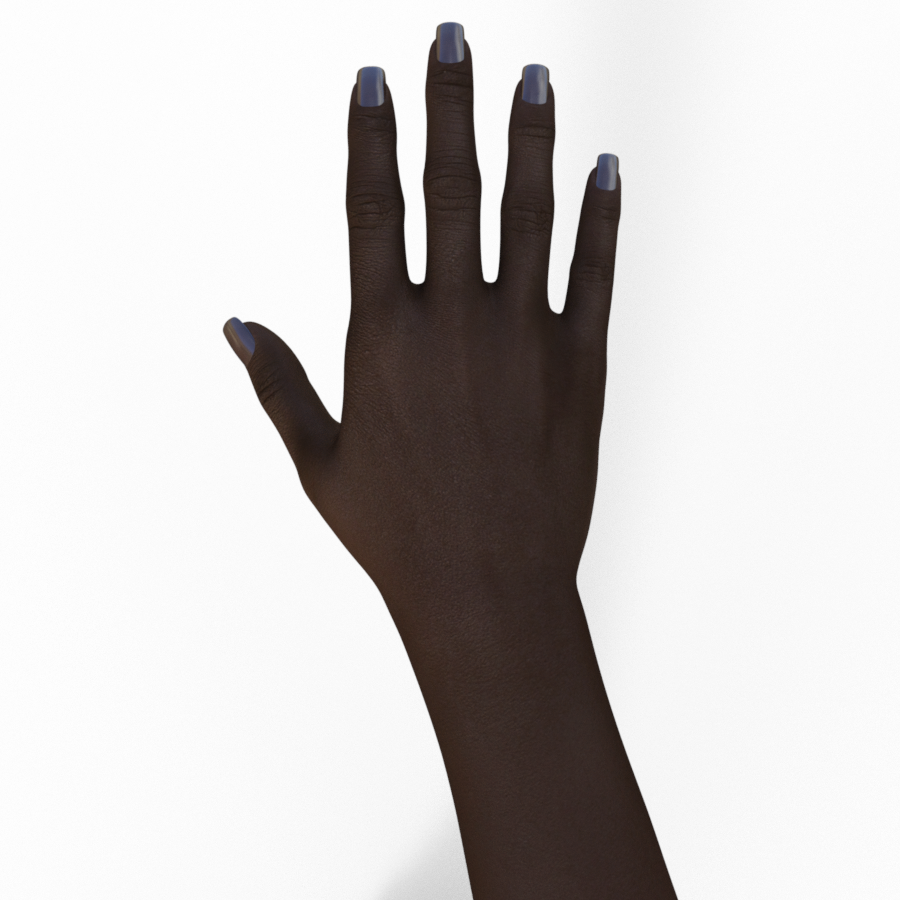

In [9]:
from PIL import Image
pic= Image.open("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper-hires1.png")
pic

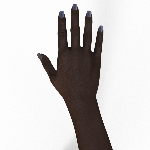

In [10]:
test_image =image.load_img("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper-hires1.png",target_size=(150,150))
test_image

In [11]:
test_image= image.img_to_array(test_image)
test_image.shape #now image is in the form that we want

(150, 150, 3)

In [12]:
#lets expand the dimensions
test_image = np.expand_dims(test_image,axis=0)
test_image.shape

(1, 150, 150, 3)

In [13]:
result = cnn.predict(test_image)
result # CNN predicts the image as papir with %100 certainity

array([[1., 0., 0.]], dtype=float32)

In [14]:
result[0]

array([1., 0., 0.], dtype=float32)

In [15]:
result[0][0]

1.0

#Now lets create a function that goes through all of these steps and returns the predictioons of the model

In [16]:
def predictor(location):
    test_image=image.load_img(location,target_size=(150,150))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    if result[0][0] == 1:
        prediction = "It is a papir"
    elif result[0][1] == 1:
        prediction = "It is a rock"
    else:
        prediction ="It is a scissors"
    return prediction

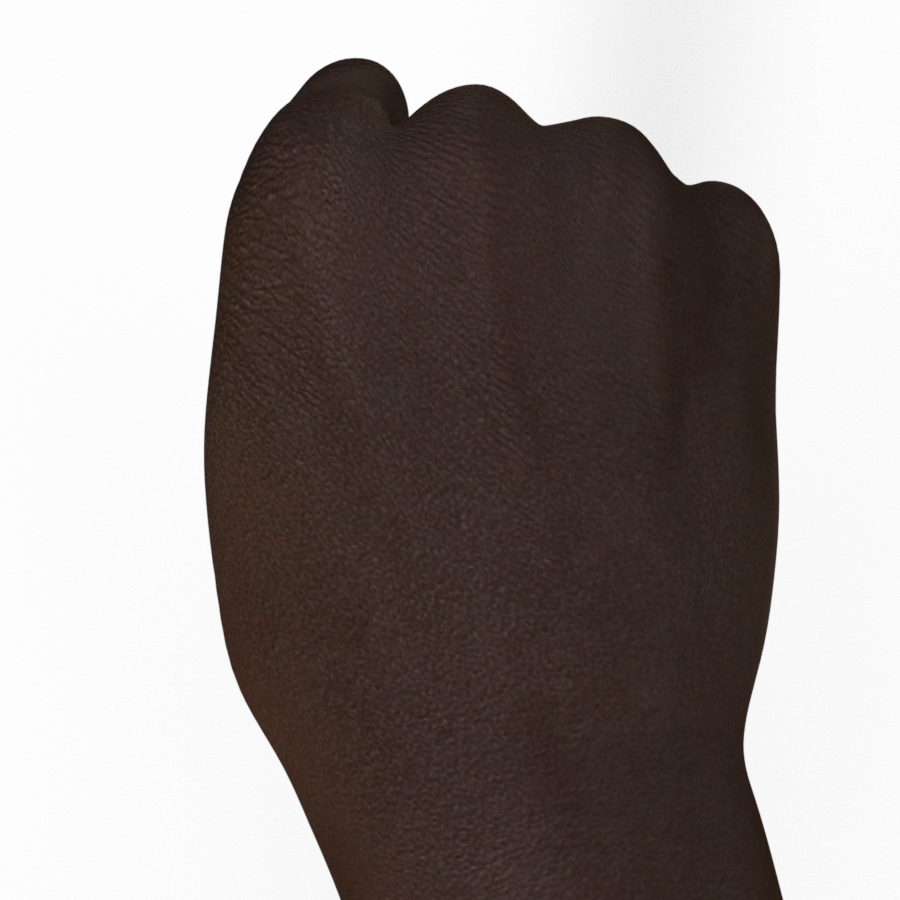

In [17]:
#Lets get another picture and test our model:
Image.open("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock-hires1.png")


In [18]:
predictor("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock-hires1.png")
#Our model predicts correctly

'It is a rock'

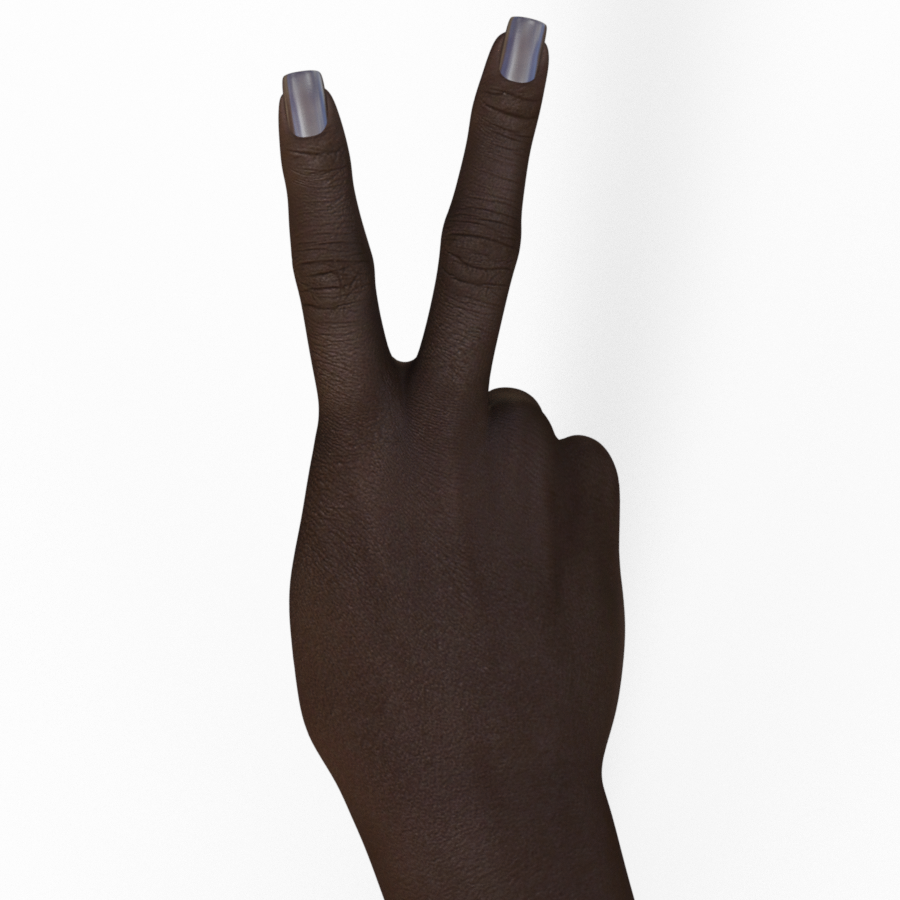

In [19]:
#Lets make another test:
Image.open("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors-hires1.png")

In [20]:
predictor("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors-hires1.png")

'It is a scissors'

In [21]:
import os
images = os.listdir(VALIDATION_DIR) # Here we create a list named images from the validation directory
images

['paper8.png',
 'paper1.png',
 'rock4.png',
 'scissors3.png',
 'rock2.png',
 'paper3.png',
 'paper7.png',
 'scissors5.png',
 'scissors7.png',
 'rock9.png',
 'scissors8.png',
 'paper2.png',
 'scissors6.png',
 'paper9.png',
 'scissors-hires1.png',
 'scissors-hires2.png',
 'rock5.png',
 'paper-hires1.png',
 'scissors4.png',
 'rock8.png',
 'rock6.png',
 'scissors9.png',
 'paper4.png',
 'rock-hires1.png',
 'scissors2.png',
 'scissors1.png',
 'rock-hires2.png',
 'rock3.png',
 'paper5.png',
 'rock7.png',
 'paper-hires2.png',
 'rock1.png',
 'paper6.png']

In [22]:
predictions= list()
for i in images:
    
    location = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/"+i
    prediction=predictor(location)
    predictions.append(prediction)
    
        

In [23]:
predictions_df= pd.DataFrame(predictions)
images_df =pd.DataFrame(images)

In [24]:
new_df= pd.concat([predictions_df,images_df],axis=1)
new_df.columns=["Predictions of CNN","Real Values"]
new_df #This comparison of prediction with the actual values
#There is %100 accuracy  in the predictions of the CNN

,Predictions of CNN,Real Values
0,It is a papir,paper8.png
1,It is a papir,paper1.png
2,It is a rock,rock4.png
3,It is a scissors,scissors3.png
4,It is a rock,rock2.png
5,It is a papir,paper3.png
6,It is a papir,paper7.png
7,It is a scissors,scissors5.png
8,It is a scissors,scissors7.png
9,It is a rock,rock9.png


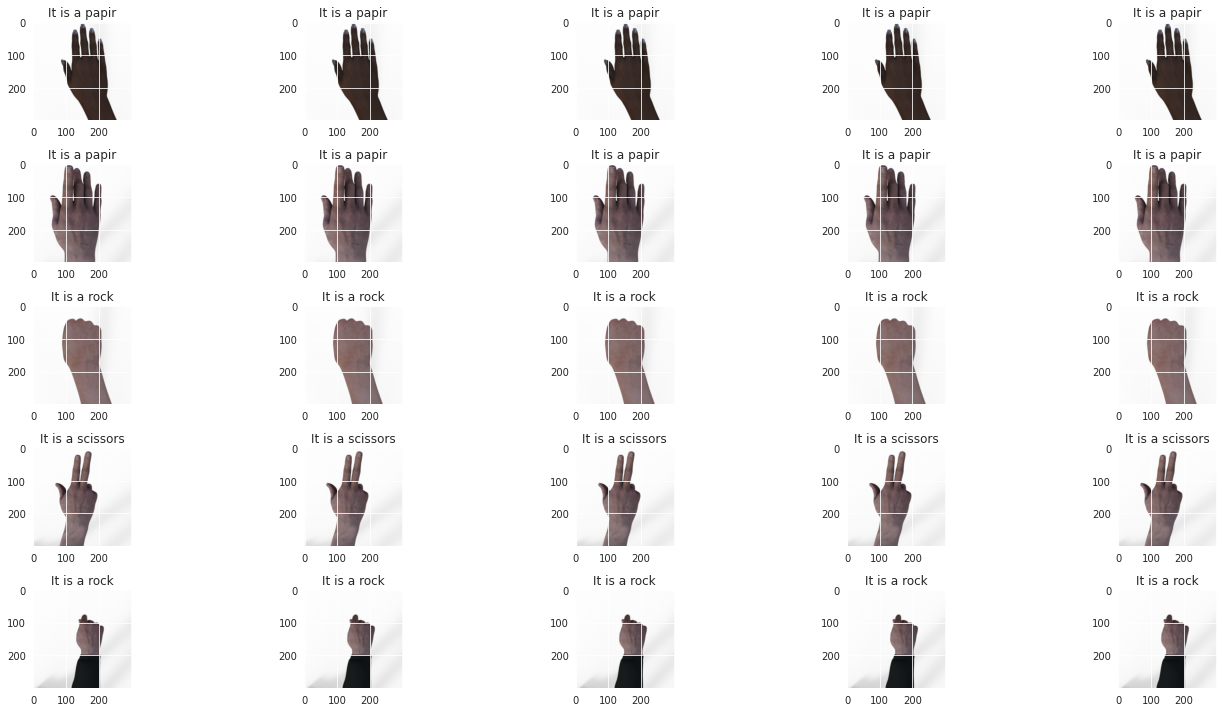

In [25]:

fig, axs = plt.subplots(5, 5, figsize=(20, 10))
count = 0
for i in images[:5]:
  # get the list of images in the particular class
    location = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/"+i
  # plot 5 images per class
    img = Image.open(location)
    for j in range(5):
        axs[count][j].title.set_text(predictor(location))
        axs[count][j].imshow(img)  
        j+=1

    count += 1
fig.tight_layout()
